In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

## Normal Distributionに沿った、確率変数を作り、pdfを描く。

ここでは、めんどくさいのでscipy.statsを使ってnormal distributionを作る。自分で作りたければ：以下の式に代入すればいい。
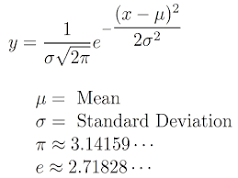

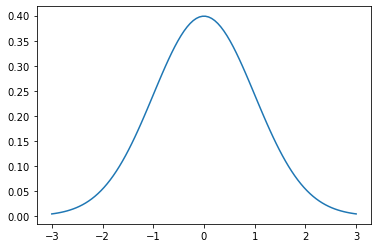

In [15]:
mu = 0  # μを設定
variance = 1  # 偏差を設定
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

mu（μ）を0に設定したため、xのExpected valueはもちろん0になる。

In [7]:
expected_value = sum(x*stats.norm.pdf(x, mu, sigma))

In [12]:
int(expected_value)

0

## Expected Valueを計算する

Expected valueを計算するとは、関数 f(x)*p(x)を積分するということ。関数f(x)*p(x)はどのようなグラフになるのだろう？
<br>例えば、f(x) = xの時、つまり、xの平均を求めたいととき、この関数はどういう形になるだろうか？

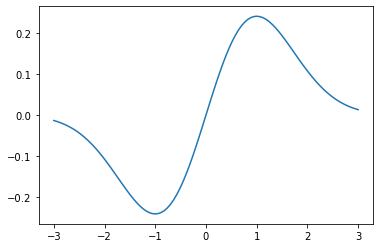

In [18]:
plt.plot(x, x*stats.norm.pdf(x, mu, sigma))

上のグラフを見ると、左側に山でき、かつ、右側に山できている。

積分とはx軸を引いたとき、のそのx軸と関数の間の面積のこと。expected value。よって、上のグラフを色付けしてみると、以下のようになる。プラスの部分が青、マイナスの部分が赤。よって、この二つを足すと自動的に相殺することになる。μが0の場合、青と赤の部分が全く同じだから、resultant area は0になる。よって、Expected value=0。

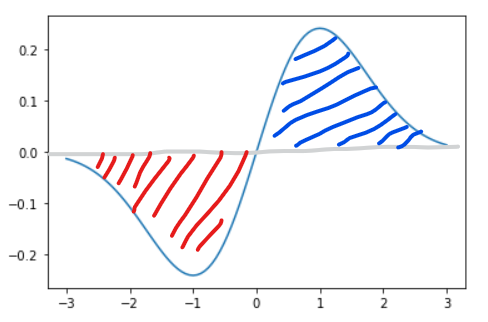

もちろんf(x)*p(x)のf(x)はxである必要はない。例えば、varinanceを計算する場合は　f(x)=(x-E[X])**2　で計算できる。

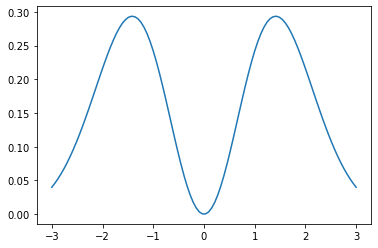

In [13]:
plt.plot(x, (x-mu)**2*stats.norm.pdf(x, mu, sigma))

グラフを見ると、symmetricalなことが分かる。これは元の確率関数がnormal distributionだから。appriximateすると、 3 * 0.3 * (1/2)* 2で0.9になる。もう少し性格にすれば、もともと設定したvariance (=1)になる。

ちなみにもともと平均値＝2にした場合、関数xp(x)はこのようなグラフになる。

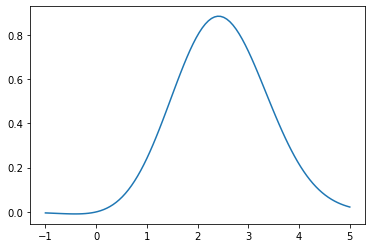

In [20]:
mu = 2  # μを設定
variance = 1  # 偏差を設定
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, x*stats.norm.pdf(x, mu, sigma))
plt.show()

だいたい、5*0.8/2=2でもともと設定した値になることが分かる

## 確率変数について

確率変数は、実際は関数のこと。じゃあどういう関数なのか？

sample space から実数に対するマッピング。sample spaceとはeventの集合だと考えればいい。また、そもそも定義的に、eventには、確率が紐づいている。つまり、「event」とはそもそもその事象の名前とそれが起きる確率という二つの事象が紐づいたものなのだ。よって、確率変数の実現値も必ず確率が紐づいている。（この「紐づいている」というのがconfusionの原因。なぜ数学者たちはアウトプットをtupleにしなかったのだろう？）
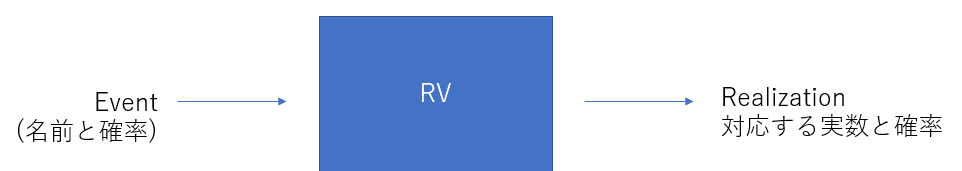

## サンプルとJoint Probabilityを考える

サンプルを母集団からn個取るとは、n個の確率変数の値を決定させると考えることができる。このn個の確率変数は全て母集団から取って来るわけだから、independentかつ、identically distributed（＝それぞれの値（例えばある年齢）が出る確率はn個の内どの確率変数で同じ）だ。これをi.i.d.という。つまり、あるサンプルをゲットする確率は、そのまま、これらn個の確立変数のjoint probabilityなのだ。

ではjoint probabilityとはなんだ？joint probabilityとは、事象Aかつ、事象Bが起きる確率のことだ。つまり、P(A⋀B) = P(A)×P(B)ということだ。
ただ、これは二つの事象のjoint probabilityに過ぎない。二つの変数のjoint probabilityはいくつか存在する。まずシンプルにdiscreteな確率変数を考える。例えば、確率変数Aが3つのeventを包括するもので、確率変数Bが二つの変数を包括するものだとしたら、合計3×2=6個のjoint probabilityが存在する。

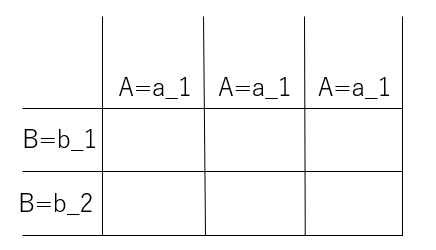

一方で、joint probabilityをcontinuousな確率変数で計算しようとすると意外と複雑だ。可視化すると一番分かりやすい。例えば、二つの確率変数間のjoint probabilityを考える場合、以下のような三次元のグラフができる。

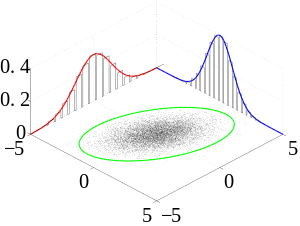

以下では実際に自分で二つのnormal distributionに従うRVのjoint probabilityを実際にプロットしてみる。

In [42]:
def create_lst(RV_X, RV_Y):
    x_data = []
    y_data = []
    z_data = []
    mu = 0  # μを設定
    variance = 1  # 偏差を設定
    sigma = math.sqrt(variance)
    
    for x in RV_X:
        for y in RV_Y:
            x_data.append(x)
            y_data.append(y)
            z_data.append(stats.norm.pdf(x, mu, sigma)* stats.norm.pdf(y, mu, sigma))
            
    return x_data, y_data, z_data

In [43]:
x_data, y_data, z_data = create_lst(x, y)

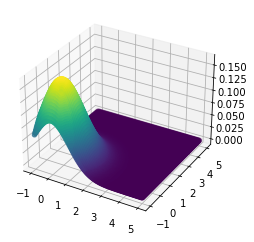

In [44]:
ax = plt.axes(projection='3d')
mu = 0  # μを設定
variance = 1  # 偏差を設定
sigma = math.sqrt(variance)

# zdata =  stats.norm.pdf(x, mu, sigma)* stats.norm.pdf(y, mu, sigma)
# xdata = x
# ydata = y
ax.scatter3D(x_data, y_data, z_data, c=z_data);

一番optimizeされてるのが、(0, 0)のところなことが分かる。これは、元のnormal distributionのmuが0に設定されていることを考えれば（normal distributionは一番μのところが確率が大きいから）納得できる。

なぜ複数のcontinuousな確率変数のojint probabilityを計算するのは複雑なのか？

そもそもcontinuous random variablesの場合、ある特定の事象xが出る確率は0だ。これはjoint probabilityの時もそうで、P(X=x, Y=y)=0だ。よって、rangeを指定しないといけない。例えば P(1<=X <= 2, 1<= Y <= 3)とか。そして、これには積分が必用だ。いわゆるmutivariable integration。イメージ↓

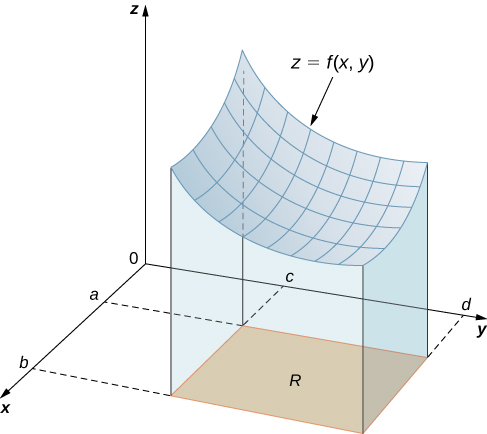

さらにサンプル数がn個あるということは、いくつでも確率変数が増えるということだ。

## sampleを母集団についてのRVの集合と捉える

よく考えてみると、joint probabilityで決定されるサンプル自体も一つのRVだといえる。
<br>しかし、このサンプルというRVは数式的な説明を持たないし、持たせることにあまり意味はない。。

「数式的な説明」とは、例えば、Y_1 +  Y_2 +, ...,+ Y_n なのか、それともY_1 ×  Y_2 ×, ...,× Y_nなのか、それともそれ以外の何かのかを指す。

なぜこの時点では決定されないのか？それは、そもそも複数のRV同士ををくっつけることに概念的な意味があるとは限らないから。
<br>例えば、テスト1のスコアを表すT1というRVがあり、テスト2のスコアを表すT2というRVがあった場合、二つのRVを「合体」させる処理として、T1+T2は概念的な、合計点数という意味を持つ。一方で、年をサンプルとして取ってくるときに、Y_1=10, Y_2 = 30, Y_3 = 15だったときに、サンプル全体のRCをY = Y_1 + Y_2 + Y_3と定義してもいいが、その場合Yは55となり、この数字に概念的な意味はない。あえていうなら三人分の年の合計となるが、それになんの意味があるのか？

むしろ大事なのは、既に説明したように、サンプルそれぞれの値がRVで定義されることだ。これらが定義されることで、あとでestimator (θ^)の質を（精度）を母集団の状況に応じて、計算することができるようになる。

## Estimator θ^

θ(Y) = parameter estimator = set of realizations of random variables(=sample)に何らかの処理をする関数

こいつをrealizationよりも抽象化して、random variables自体をparameter esimator に入れると、推定パラメター（θ^）をYに関係するRVとして捉えることができ、こいつのpdfを作ることができる。

つまり θ^(y_1, y_2, y_3,...y_n)ではなくθ^(Y_1, Y_2, Y_3,...Y_n) i.e. θ^(Y)ということ。

1)元のRVが変わると、また、2)関数θ^自体が変わると、estimate θ^自体がどう変わるのか？を推測することができる。つまり、母集団のdistributionの状況に応じて、estimatorの質を測ることができるということ。

Estimated valueを計算する。
θ^もRVなら、もちろんそれについてのexpected valueを計算できる。θ^はcontinuous random variableだから、そのexpected valueは積分で表現できる。

E[θ^(Y)] = ∫θ^p(θ^) dθ^

さらに、先ほど挙げたように、関数θ^はYをインプットとして受けるため、上の式をYで表現することができる。
E[θ^(Y)] = ∫θ^p(θ^) dθ^ = joint probabiity

realizationとprobability(realization)のそれぞれを、Yを使って展開する：
realization = θ^ = (θ(Y_1 = y_1, Y_2 = y_2, ... Y_n = y_n)) -> イメージ：ある固有のサンプルができ、それが関数θ^に入ることで、estimateθ^が決定する。
あるθ^が出る確率 ＝ p(θ^) = p(Y_1 = y_1, Y_2 = y_2, ... Y_n = y_n |θ) -> イメージ：あるθが出る確率は、あるサンプルができる確率.
そして当たり前だが、このYは母集団のpdfによる。だから、conditional probability problemがある。

変数がいくつもあるということは、これはn次元のmutivariableな関数ということ。joint probabilityの分布の点(x, y, z, w, ...n)それぞれに、対応するrealizationの値をかけたグラフ（図形）をイメージする。この図形の面積の足し算がE[θ^(Y)]だから、multivaribale integrationが必用。

よって、E[θ^(Y)] = ∫θ^p(θ^) dθ^ = ∫...∫∫θ(Y_1 = y_1, Y_2 = y_2, ... Y_n = y_n)* p(Y_1 = y_1, Y_2 = y_2, ... Y_n = y_n |θ) dY_1, dY_2,...dY_n 


（ちなみにこれはestimatorが単射でなくても成り立つ。なぜか？realizationの中に、同じθ^が出てくる場合もあるから、違うインプットで同じθ^ができた場合それらもしっかりとカウントされる。）

可視化しようとすると：<br>
さっき計算したjoint probabilityのグラフそれぞれのポイントに×θ^するイメージ。実際は関数f(θ, Y) →joint probability×θが必用。θとy_1, y_2,y_2がそれぞれ変わると、アウトプットが変わる関数。つまり、二つの確率変数があった場合は四次元になる（θで一次元、確率変数それぞれ一次元＝二次元、アウトプットで一次元）。

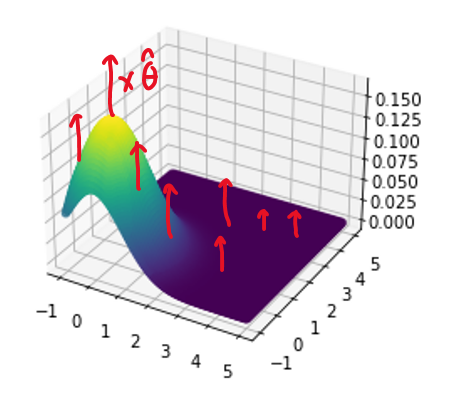

Y_1, Y_2からθ^とP(y_1, y_2)の両方を求めることができる。この関数の積分がExpected Value。

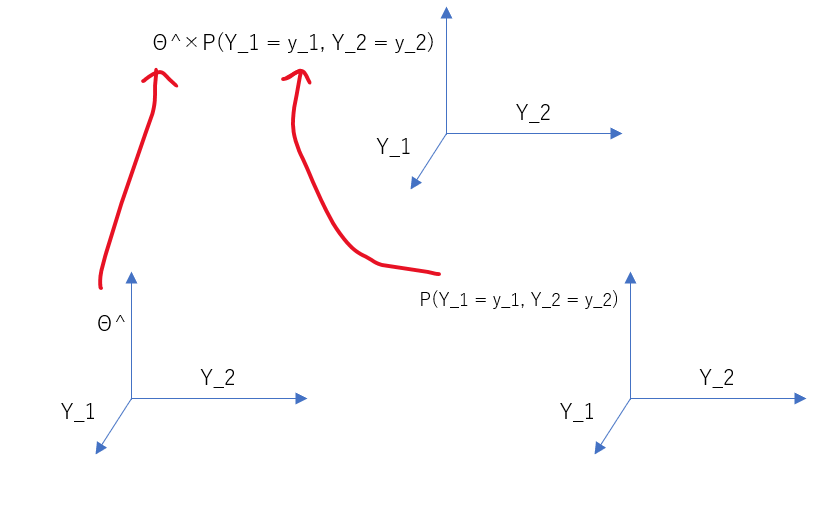

In [ ]:
# def ML_mu(Y_1, Y_2):
#     mu = 0  # μを設定
#     variance = 1  # 偏差を設定
#     sigma = math.sqrt(variance)
    
#     for y_1 in Y_1:
#         for y_2 in Y_2:
            
#         theta = 1/2 * (y_1 + y_2)  // realization
#         prob = stats.norm.pdf(y_1, mu, sigma)*stats.norm.pdf(y_2, mu, sigma)
        
#         prob*theta